In [1]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')


In [2]:
data_ = pd.read_csv("Battery_RUL.csv")
df=data_

First up is just to eyeball the data.


In [3]:
df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


<a id='3'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>EDA</b>

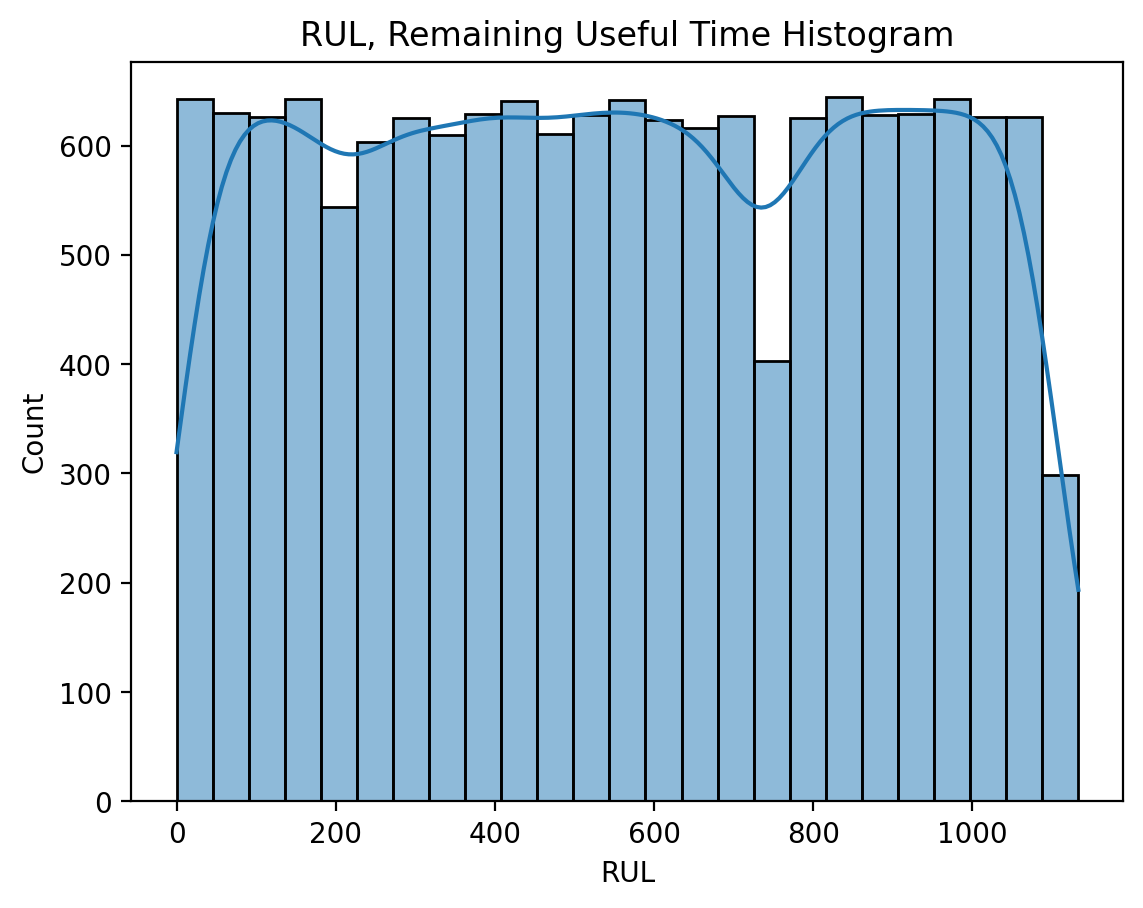

In [4]:
plt.title('RUL, Remaining Useful Time Histogram')
sns.histplot(df.RUL, kde=True)
plt.show()

In [ ]:
df['Battery ID']= 0
batteries=[]
ID=1
for rul in df['RUL']:
    batteries.append(ID)
    if rul == 0:
        ID+=1
        continue
df['Battery ID'] = batteries

In [ ]:
sensor_list = df.columns[1:-2]
sensor_list

Index(['Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  int64  
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
 9   Battery ID                 15064 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 1.1 MB


Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
Battery ID                   0
dtype: int64

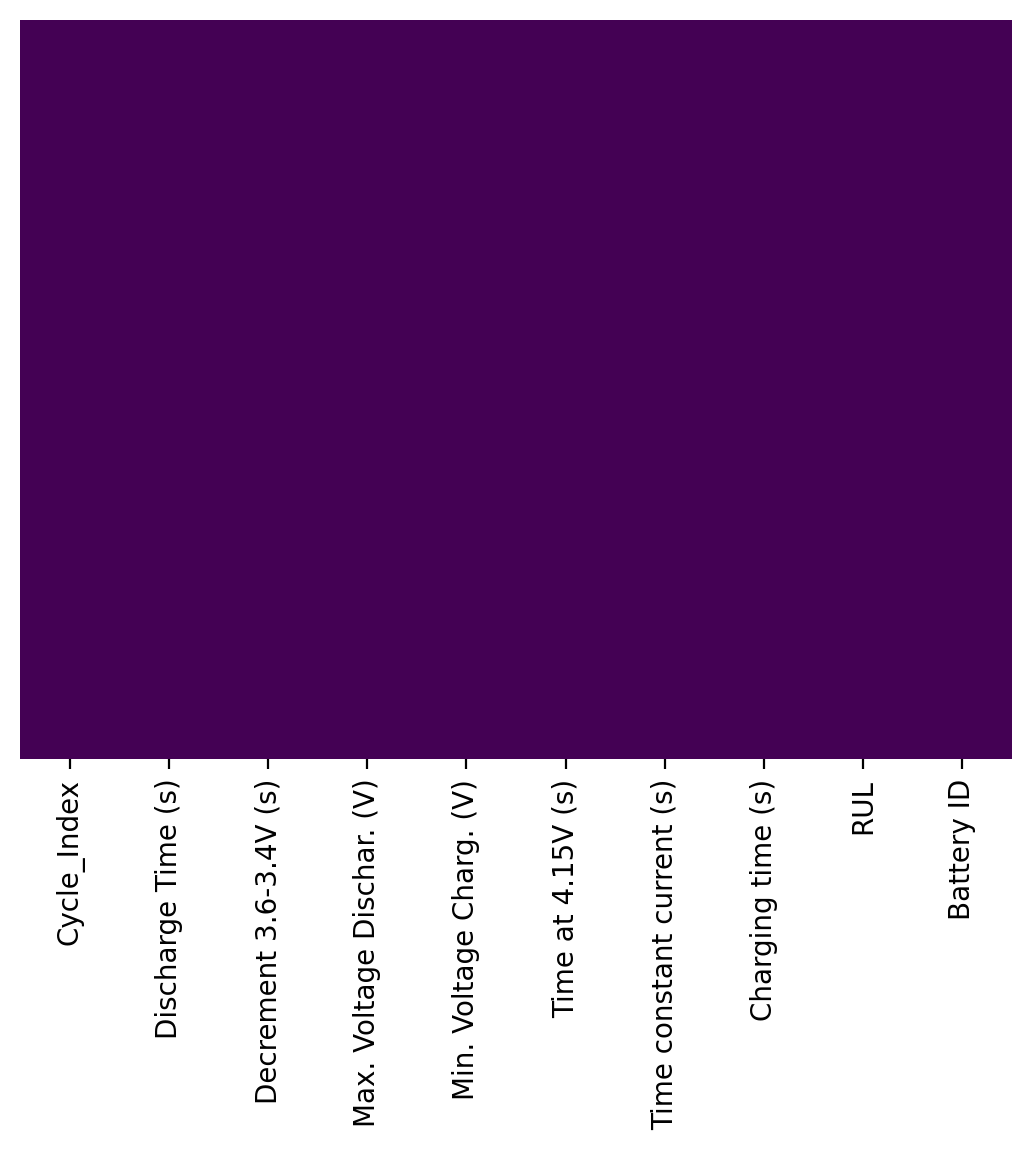

In [ ]:
df.info()
#Lets now check for null fields
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.isnull().sum()

In [ ]:
# Duplicates VALUE
print(f'Duplicates in the dataset: {df.duplicated().sum()}')
print(f'Percentage of duplicates: {df.duplicated().sum()/len(df)*100}%')
# if 0.0 % that means No Duplicate data

Duplicates in the dataset: 0
Percentage of duplicates: 0.0%


In [ ]:
#Cardinality
df.nunique()
# To determine the maximum and minimum number of variations in each column of the dataset

Cycle_Index                   1124
Discharge Time (s)           10889
Decrement 3.6-3.4V (s)        4719
Max. Voltage Dischar. (V)      437
Min. Voltage Charg. (V)        757
Time at 4.15V (s)            10362
Time constant current (s)     3148
Charging time (s)            11865
RUL                           1133
Battery ID                      14
dtype: int64

In [ ]:
# data describtio
df.describe().T.style.background_gradient()
# Significant higher and lower values in a dataset are highlighted

,count,mean,std,min,25%,50%,75%,max
Cycle_Index,15064.000000,556.155005,322.378480,1.000000,271.000000,560.000000,833.000000,1134.000000
Discharge Time (s),15064.000000,4581.273960,33144.012077,8.690000,1169.310000,1557.250000,1908.000000,958320.370000
Decrement 3.6-3.4V (s),15064.000000,1239.784672,15039.589269,-397645.908000,319.600000,439.239471,600.000000,406703.768000
Max. Voltage Dischar. (V),15064.000000,3.908176,0.091003,3.043000,3.846000,3.906000,3.972000,4.363000
Min. Voltage Charg. (V),15064.000000,3.577904,0.123695,3.022000,3.488000,3.574000,3.663000,4.379000
Time at 4.15V (s),15064.000000,3768.336171,9129.552477,-113.584000,1828.884179,2930.203500,4088.326500,245101.117000
Time constant current (s),15064.000000,5461.266970,25155.845202,5.980000,2564.310000,3824.260000,5012.350000,880728.100000
Charging time (s),15064.000000,10066.496204,26415.354121,5.980000,7841.922500,8320.415000,8763.282500,880728.100000
RUL,15064.000000,554.194172,322.434514,0.000000,277.000000,551.000000,839.000000,1133.000000
Battery ID,15064.000000,7.486126,4.023541,1.000000,4.000000,7.000000,11.000000,14.000000


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

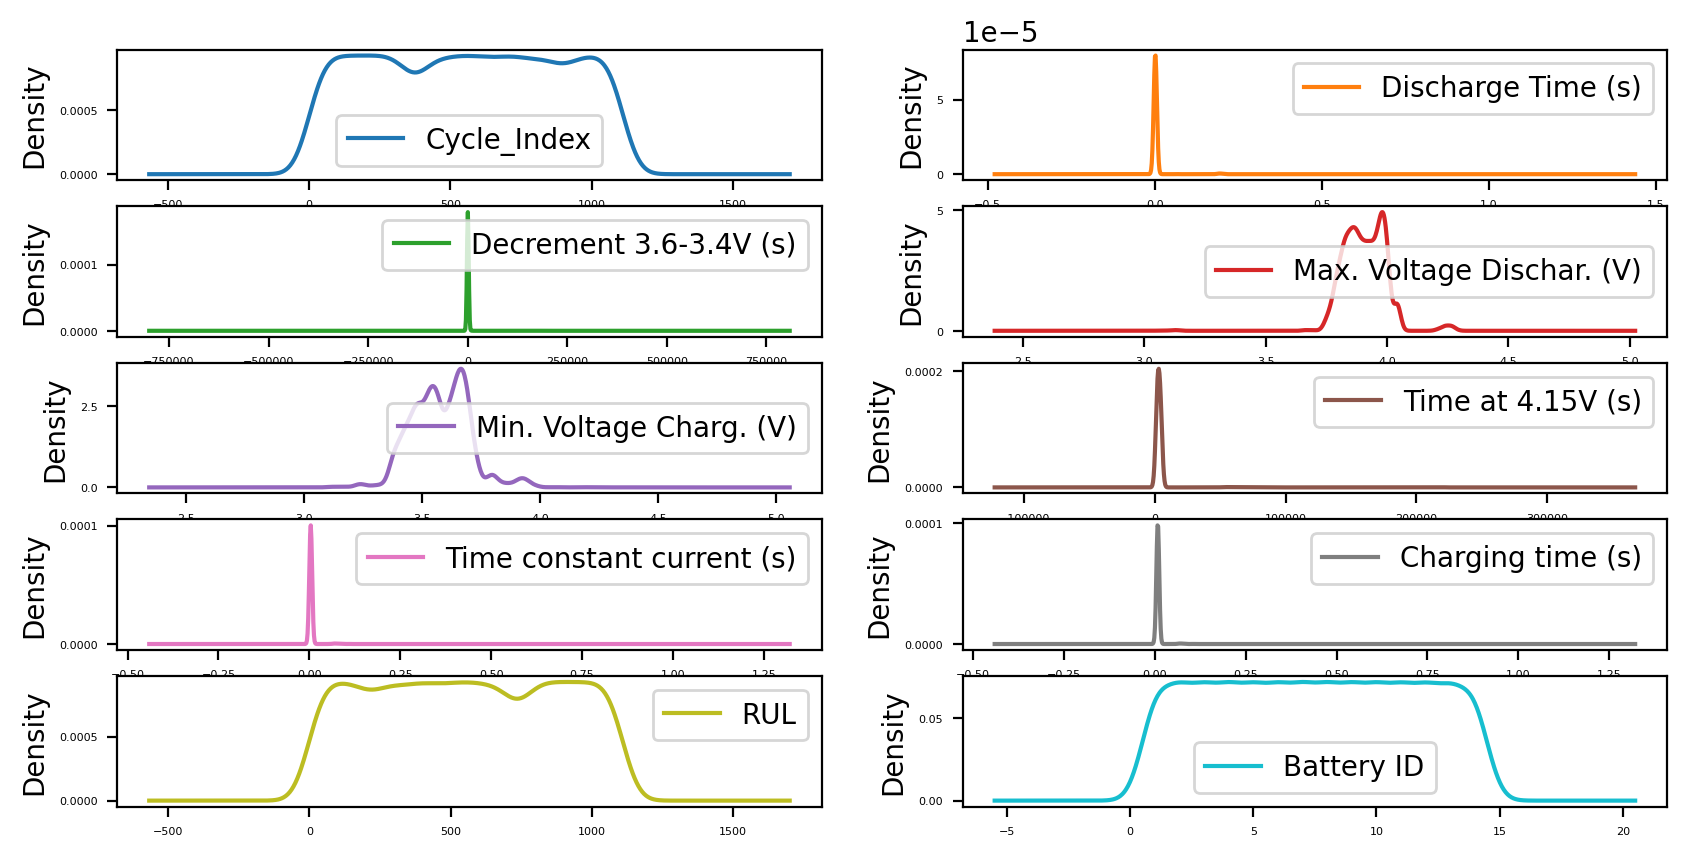

In [ ]:
# Let's have a look at the numerical value density.
df.plot(kind='density', subplots=True, layout=(10,2), sharex=False, sharey=False,fontsize=4, figsize=(10,10))

In [ ]:
train_battery_ids = []
test_battery_ids = []
battery_ids = df['Battery ID'].unique()

for i in battery_ids:
    if i<9:
        train_battery_ids.append(i)
    else:
        test_battery_ids.append(i)
df_train = df[df['Battery ID'].isin(train_battery_ids)]
df_test = df[df['Battery ID'].isin(test_battery_ids)]

We find the RUL for the components at each cycle

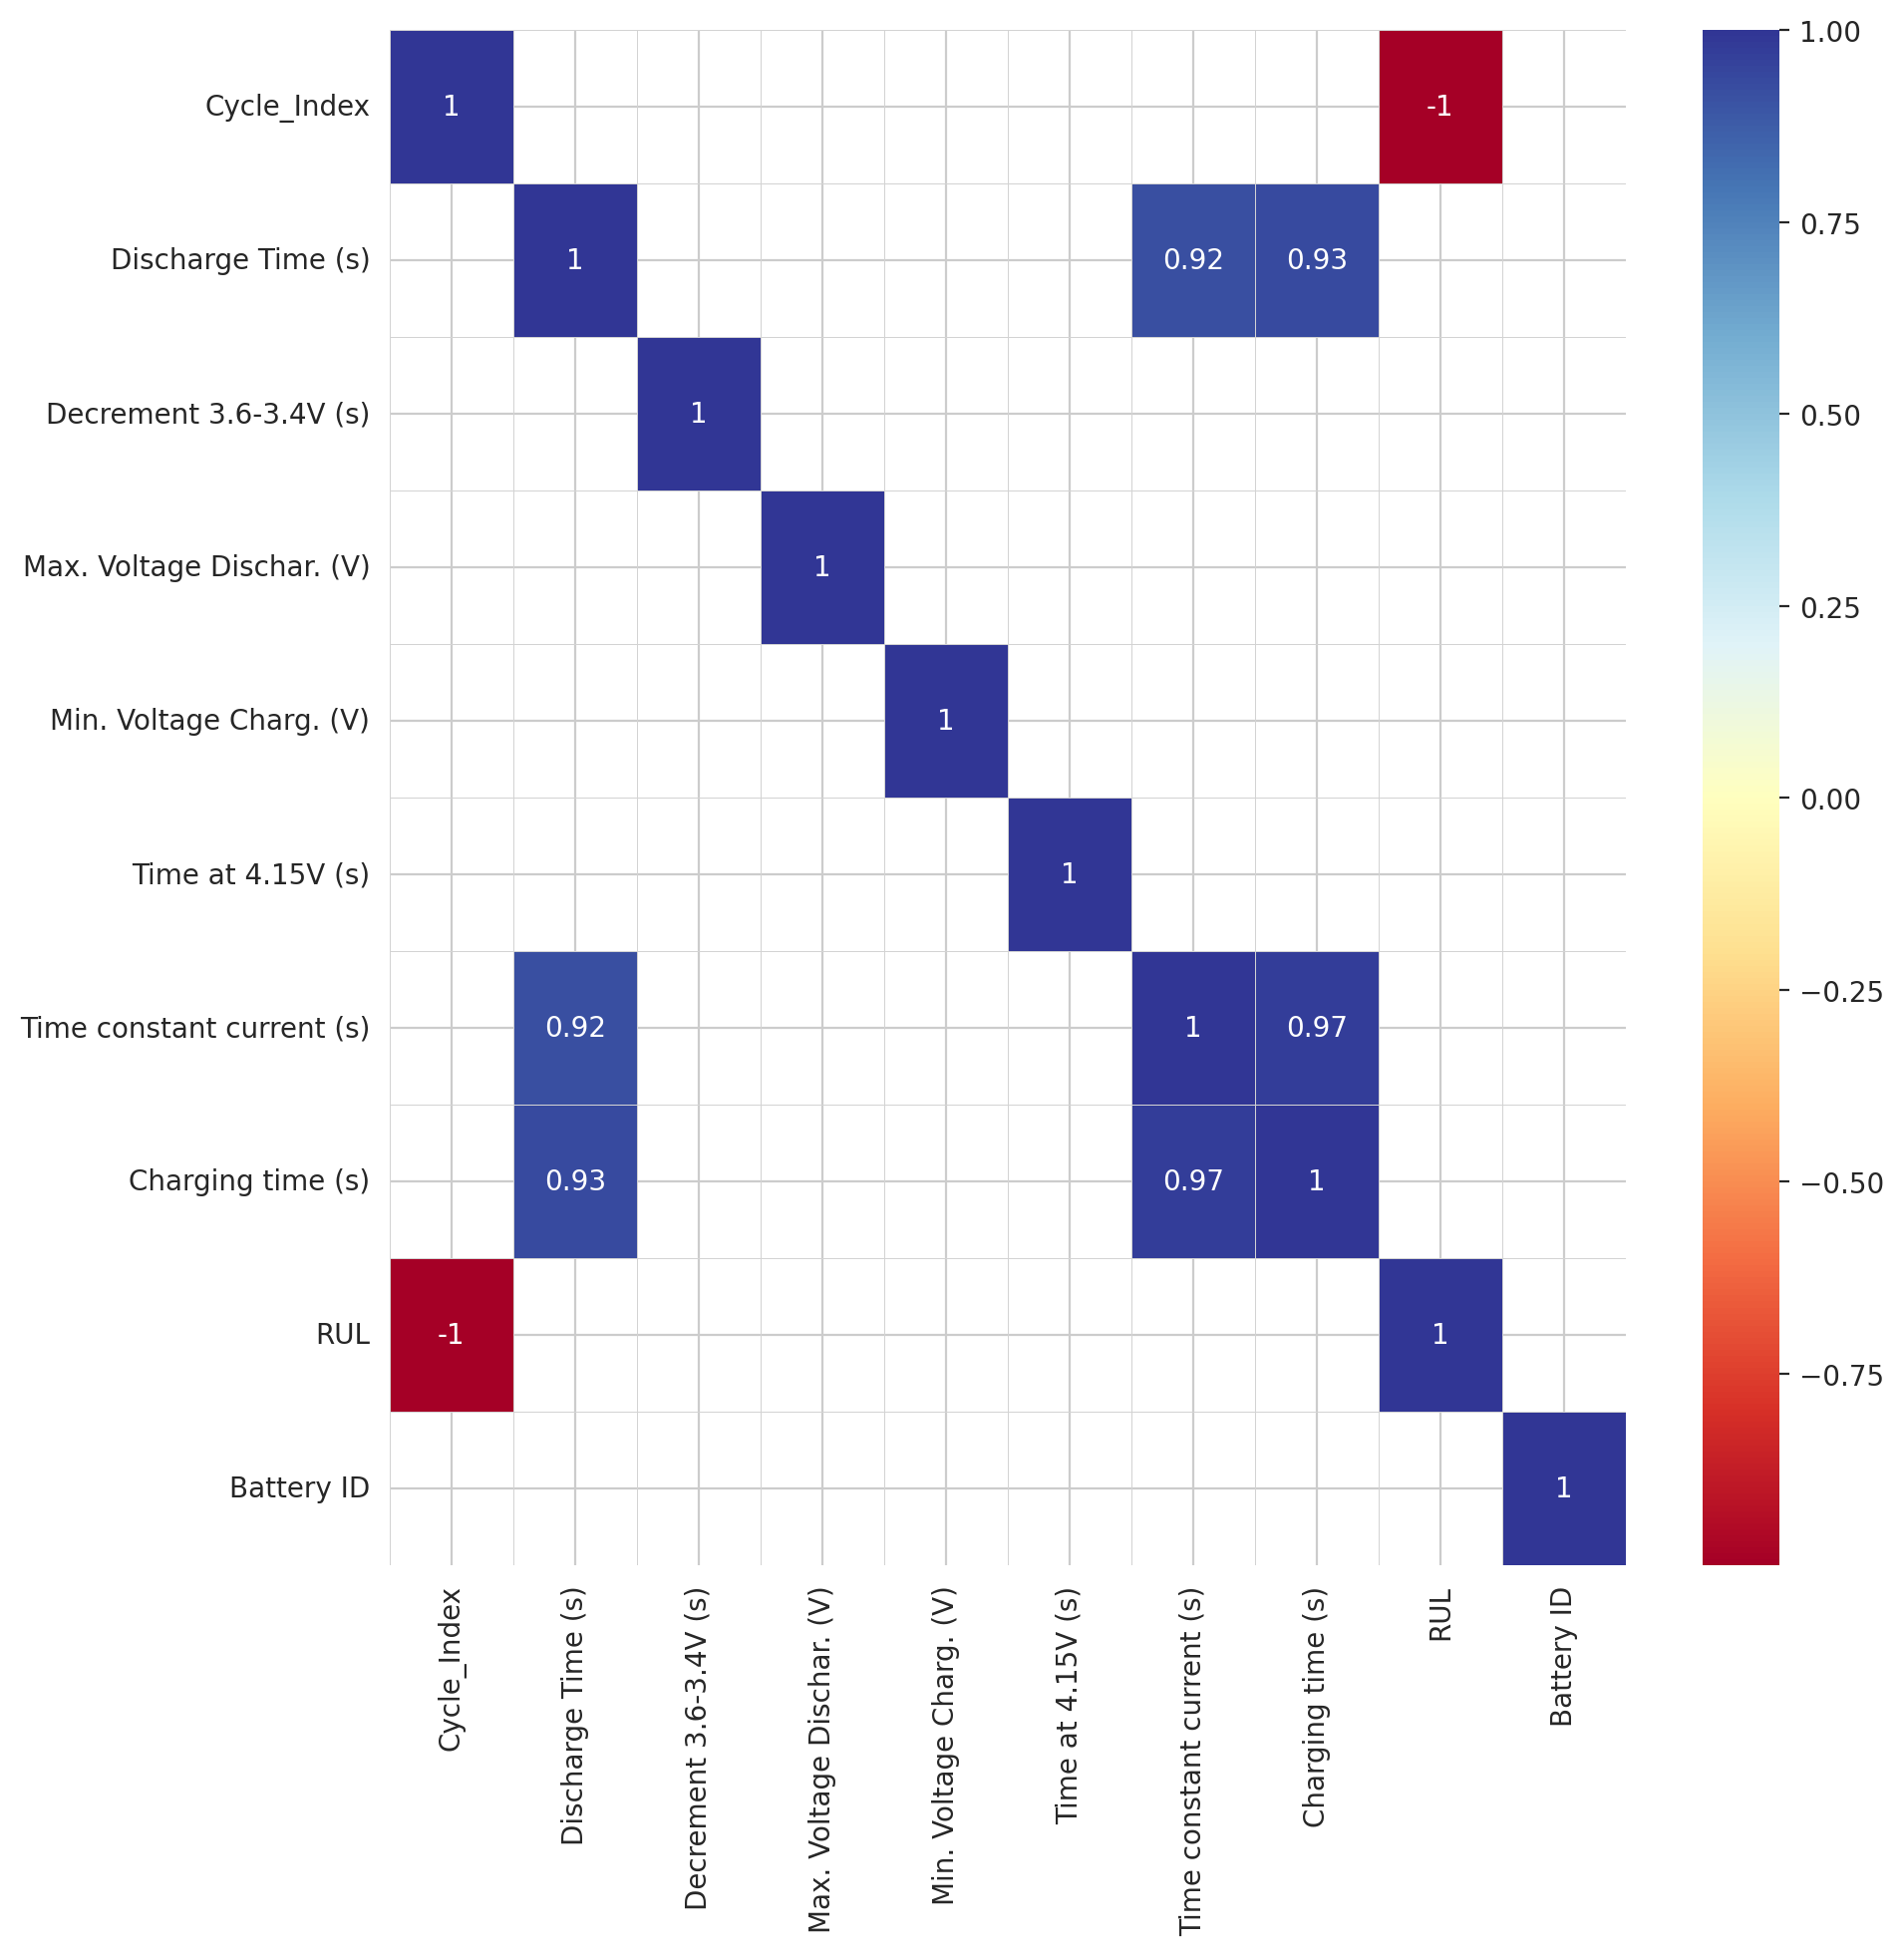

In [ ]:
plt.figure(figsize=(10,10))
threshold = 0.90
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')

sensors with constant values can be dropped as they have no predictive power

In [ ]:
sens_const_values = []
for feature in list(sensor_list):
    try:
        if df_train[feature].min()==df_train[feature].max():
            sens_const_values.append(feature)
    except:
        pass

print(sens_const_values)
df_train.drop(sens_const_values,axis=1,inplace=True)
df_test.drop(sens_const_values,axis=1,inplace=True)

[]


Drop one of the highly correlated features and keep the other. The threshold for correlation is set at 0.95

In [ ]:
# corr_features = ['sensor_9']

cor_matrix = df_train[sensor_list].corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(corr_features)
df_train.drop(corr_features,axis=1,inplace=True)
df_test.drop(corr_features,axis=1,inplace=True)

['Charging time (s)']


The remaining features

In [ ]:
list(df_train)

['Cycle_Index',
 'Discharge Time (s)',
 'Decrement 3.6-3.4V (s)',
 'Max. Voltage Dischar. (V)',
 'Min. Voltage Charg. (V)',
 'Time at 4.15V (s)',
 'Time constant current (s)',
 'RUL',
 'Battery ID']

In [ ]:
df_train.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),RUL,Battery ID
0,1,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,1112,1
1,2,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,1111,1
2,3,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,1110,1
3,4,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,1109,1
4,6,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,1107,1


In [ ]:
features = list(df_train.columns)
features

['Cycle_Index',
 'Discharge Time (s)',
 'Decrement 3.6-3.4V (s)',
 'Max. Voltage Dischar. (V)',
 'Min. Voltage Charg. (V)',
 'Time at 4.15V (s)',
 'Time constant current (s)',
 'RUL',
 'Battery ID']

In [ ]:
for feature in features:
    print(feature + " - " + str(len(df_train[df_train[feature].isna()])))

Cycle_Index - 0
Discharge Time (s) - 0
Decrement 3.6-3.4V (s) - 0
Max. Voltage Dischar. (V) - 0
Min. Voltage Charg. (V) - 0
Time at 4.15V (s) - 0
Time constant current (s) - 0
RUL - 0
Battery ID - 0


The charts below shows what the data looks like. It is a bit noisy between charging and discharging, but it turns out that this information is important, i.e. you will not get better results by smoothing out the data.

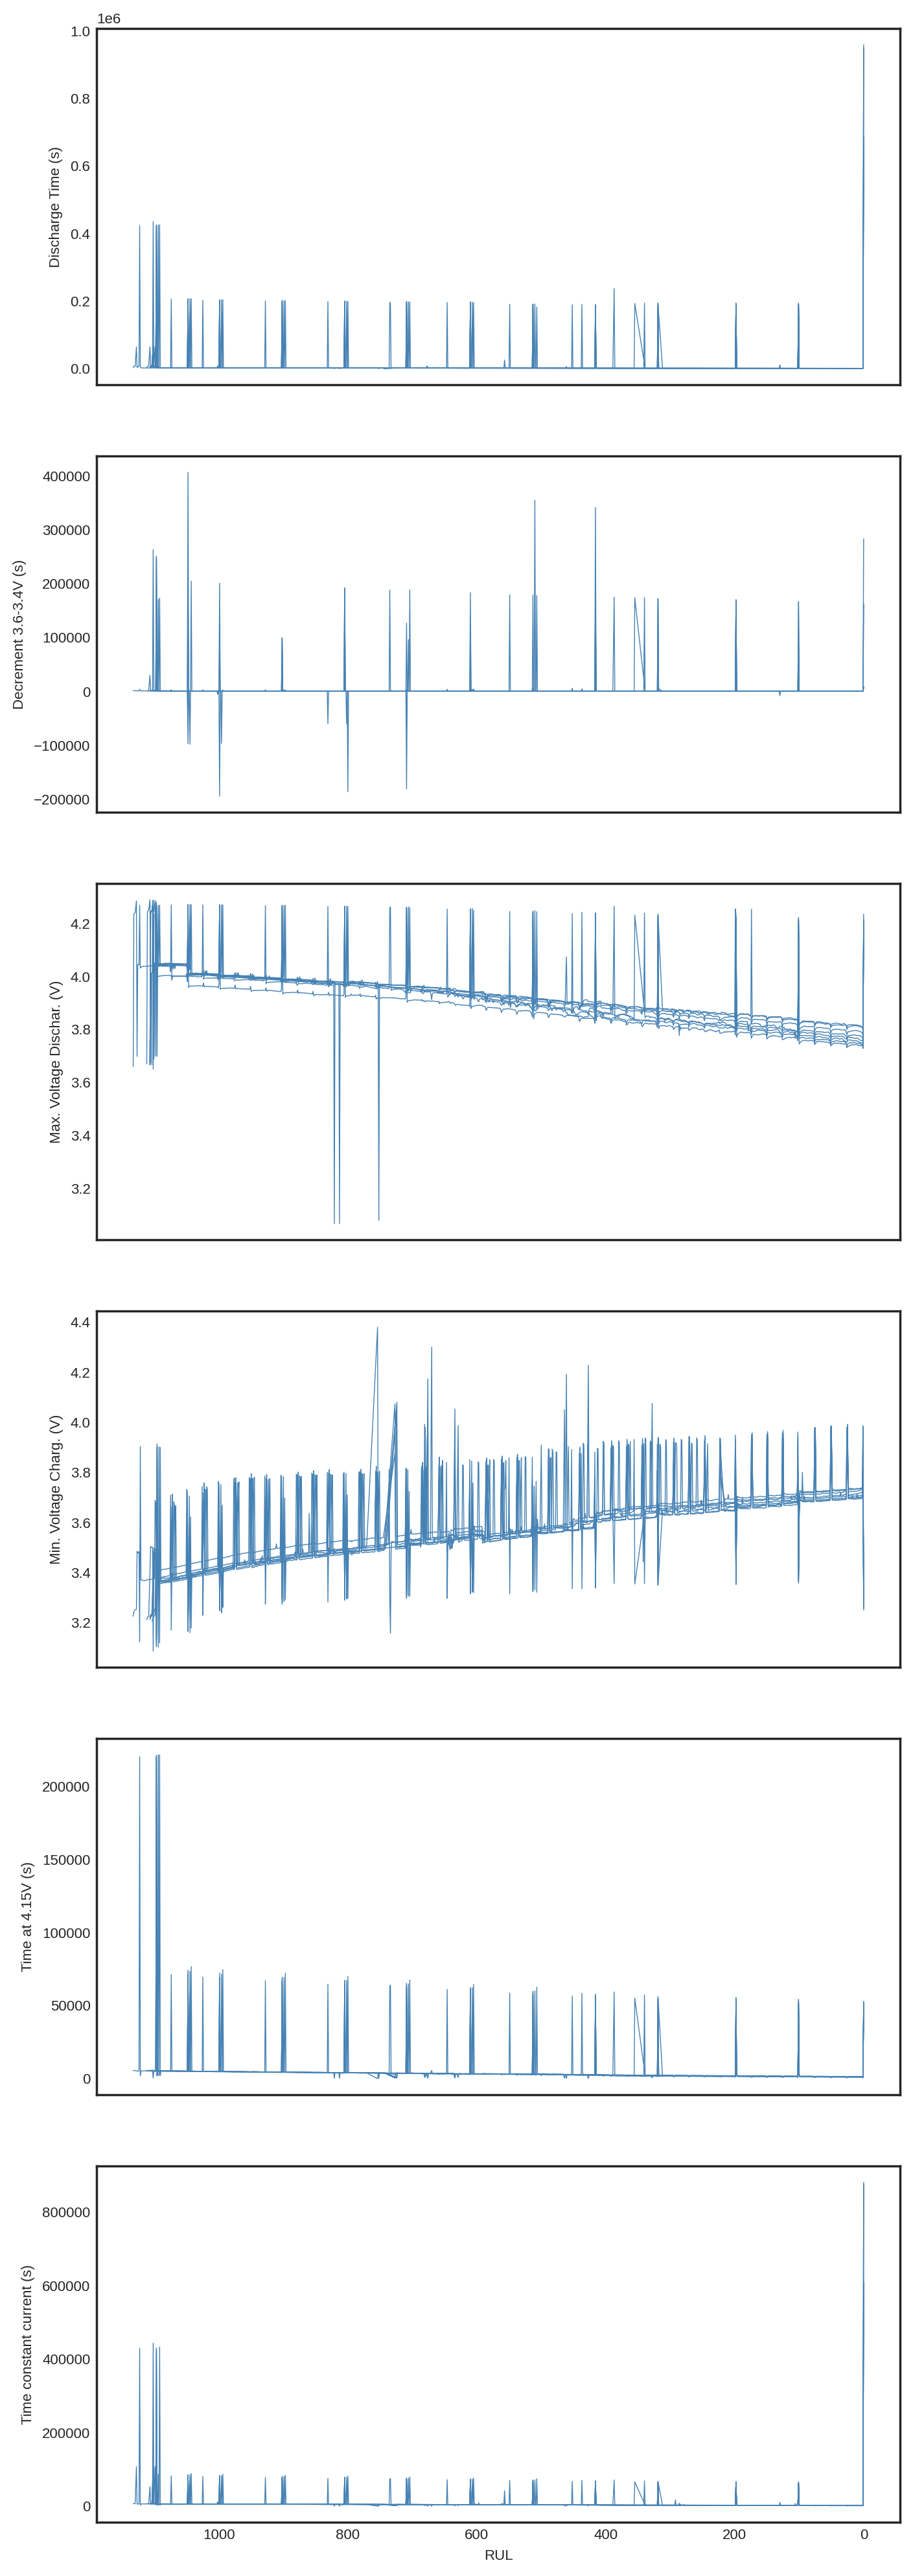

In [ ]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,25
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 0.5
plot_items = list(df_train.columns)[1:-2]
fig,ax = plt.subplots(len(plot_items),sharex=True)
ax[0].invert_xaxis()

batteries = list(df_train['Battery ID'].unique())
#batteries
batteries_test = list(df_test['Battery ID'].unique())

for battery in batteries:
    for i,item in enumerate(plot_items):
        f = sns.lineplot(data=df_train[df_train['Battery ID']==battery],x='RUL',y=item,color='steelblue',ax=ax[i],
                        )

<a id='3'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Pre-processing and Feature Selection</b>

Perform a statistical univariate test to determine the best features.

In [ ]:
Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
X = df_train.iloc[:,1:-2]
y = df_train.iloc[:,-1]
backward_regression(X, y)

worst_feature : Discharge Time (s), 0.6118354897900773 
worst_feature : Time constant current (s), 0.8328957968130314 
worst_feature : Time at 4.15V (s), 0.5118302965194652 
worst_feature : Decrement 3.6-3.4V (s), 0.18978539400683592 

Selected Features:
['Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)']


In [ ]:
feature_names = Selected_Features[0]

<a id='4'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Modelling and Evaluation</b>

In [ ]:
import time
model_performance = pd.DataFrame(columns=['r-Squared','RMSE','total time'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score

model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [ ]:
X_train = df_train[feature_names]
y_train = df_train['RUL']

X_test = df_test[feature_names]
y_test = df_test['RUL']

y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 6435 entries, 8629 to 15063
Series name: RUL
Non-Null Count  Dtype
--------------  -----
6435 non-null   int64
dtypes: int64(1)
memory usage: 100.5 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc = MinMaxScaler()
# sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>kNN</b>

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
%%time
from sklearn.neighbors import KNeighborsRegressor
start = time.time()
model = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()



model_performance.loc['kNN'] = [model.score(X_test,y_test),
                                   mean_squared_error(y_test,y_predictions,squared=False),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:f}".format(mean_squared_error(y_test,y_predictions,squared=False)))
print('Training accuracy: {:%}'.format(model.score(X_train, y_train)))
print('Testing accuracy: {:%}'.format(model.score(X_test, y_test)))


R-squared error: 93.029342%
Root Mean Squared Error: 85.002005
Training accuracy: 98.881704%
Testing accuracy: 93.029342%
CPU times: user 115 ms, sys: 14.2 ms, total: 129 ms
Wall time: 247 ms


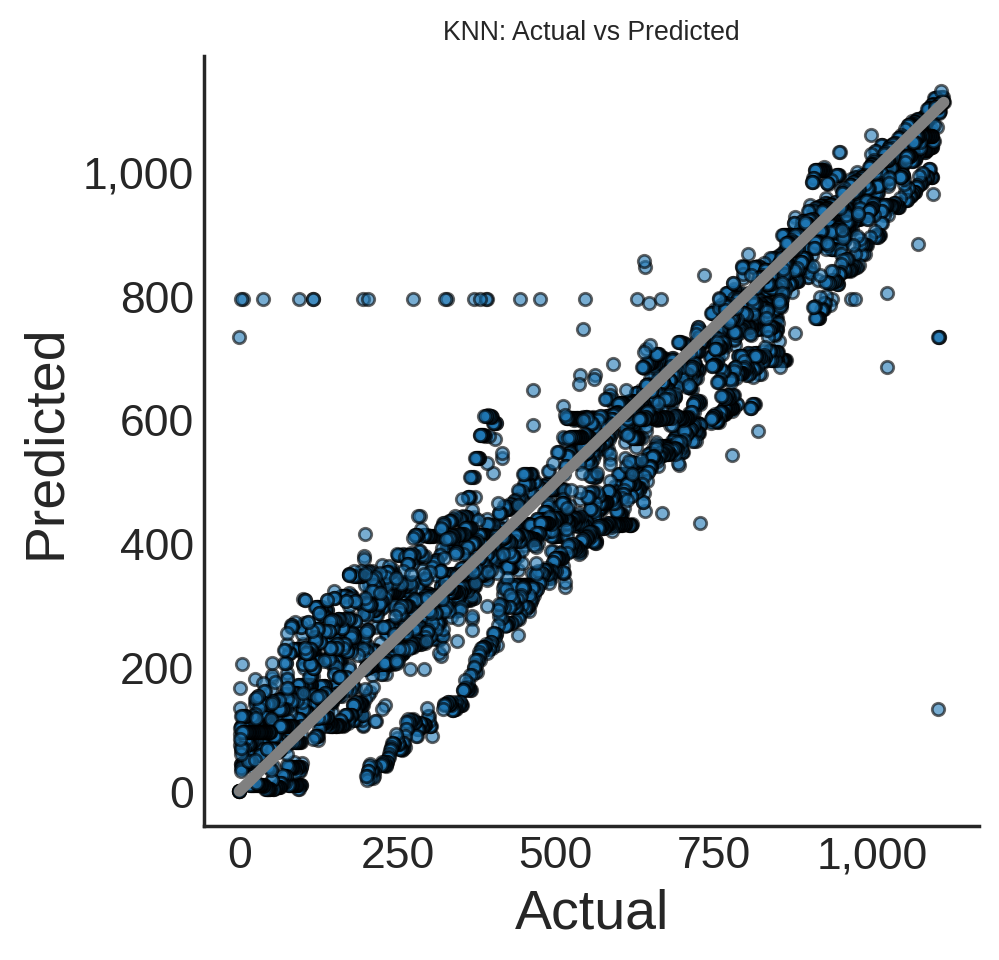

In [ ]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=5,5
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('KNN: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=20,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

<a id='4_2'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>SVR</b>

In [ ]:
%%time
from sklearn.svm import SVR
start = time.time()
model = SVR(kernel="rbf", C=10000, gamma=0.5, epsilon=0.001).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

model_performance.loc['SVM'] = [model.score(X_test,y_test),
                                   mean_squared_error(y_test,y_predictions,squared=False),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]


print('R-squared error: '+ "{:%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:f}".format(mean_squared_error(y_test,y_predictions,squared=False)))
print('Training accuracy: {:%}'.format(model.score(X_train, y_train)))
print('Testing accuracy: {:%}'.format(model.score(X_test, y_test)))

R-squared error: 87.237275%
Root Mean Squared Error: 115.017519
Training accuracy: 87.345750%
Testing accuracy: 87.237275%
CPU times: user 20.9 s, sys: 183 ms, total: 21.1 s
Wall time: 21.5 s


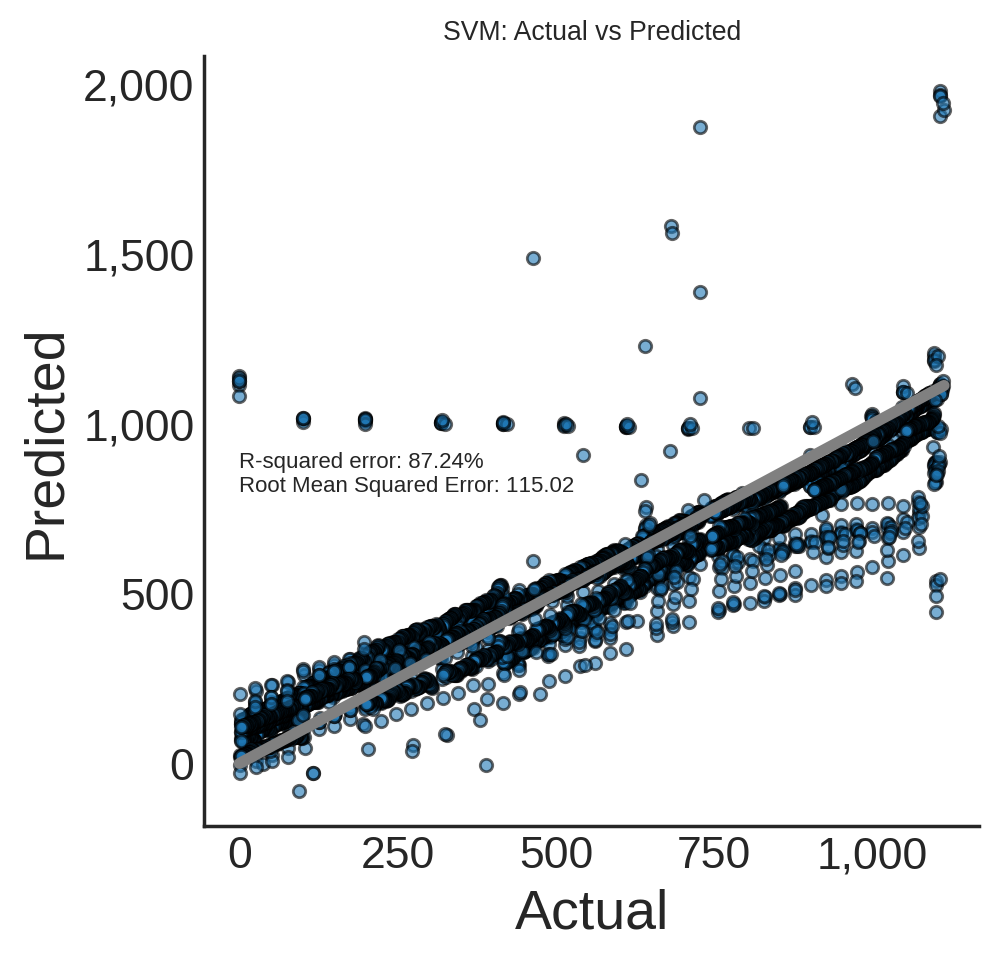

In [ ]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=5,5
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('SVM: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=20,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False))),
             xy=(0,800),
             size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

<a id='4_3'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Random Forest</b>

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
start = time.time()
model = RandomForestRegressor(n_jobs=-1,
                              n_estimators=100,
                              min_samples_leaf=1,
                              max_features='sqrt',
                              # min_samples_split=2,
                              bootstrap = True,
                              criterion='squared_error',
                             ).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

model_performance.loc['Random Forest'] = [model.score(X_test,y_test),
                                   mean_squared_error(y_test,y_predictions,squared=False),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]


print('R-squared error: '+ "{:%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:f}".format(mean_squared_error(y_test,y_predictions,squared=False)))
print('Training accuracy: {:%}'.format(model.score(X_train, y_train)))
print('Testing accuracy: {:%}'.format(model.score(X_test, y_test)))

R-squared error: 94.271191%
Root Mean Squared Error: 77.059189
Training accuracy: 99.345366%
Testing accuracy: 94.271191%
CPU times: user 1.83 s, sys: 157 ms, total: 1.99 s
Wall time: 1.23 s


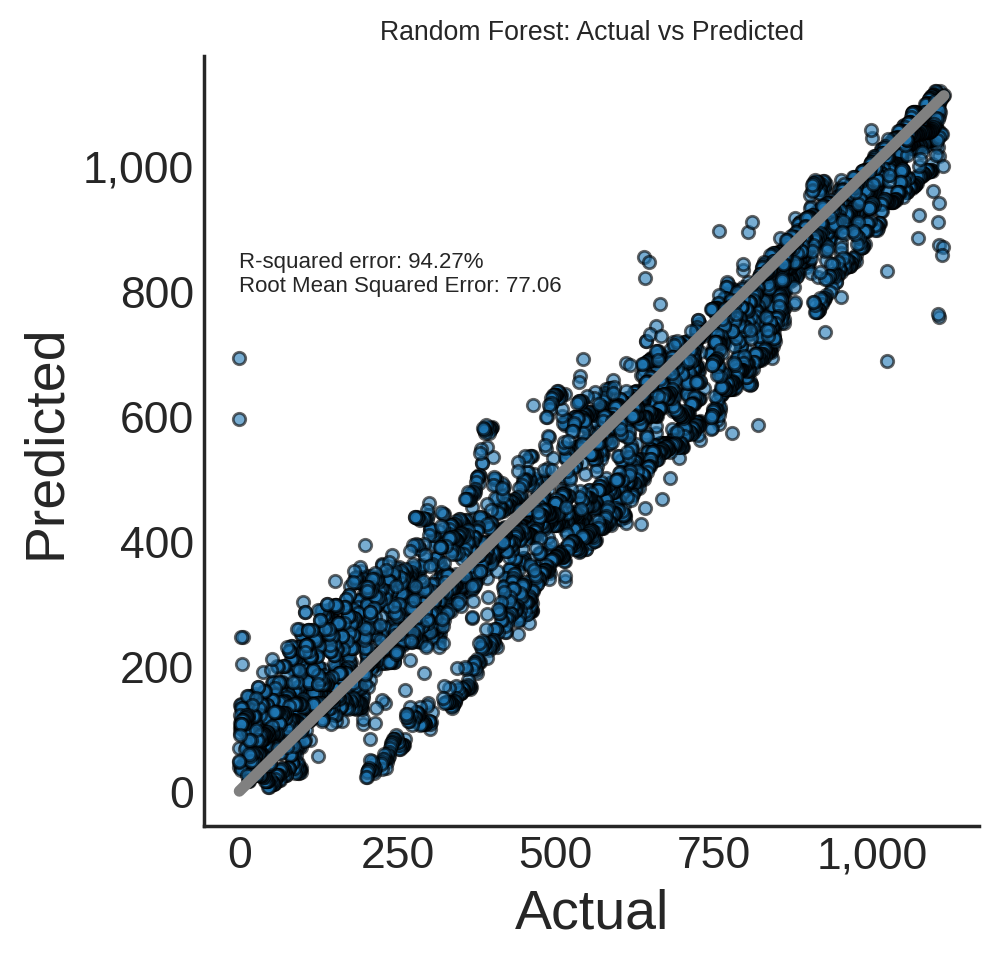

In [ ]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=5,5

fig,ax = plt.subplots()
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=20,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False))),
             xy=(0,800),
             size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

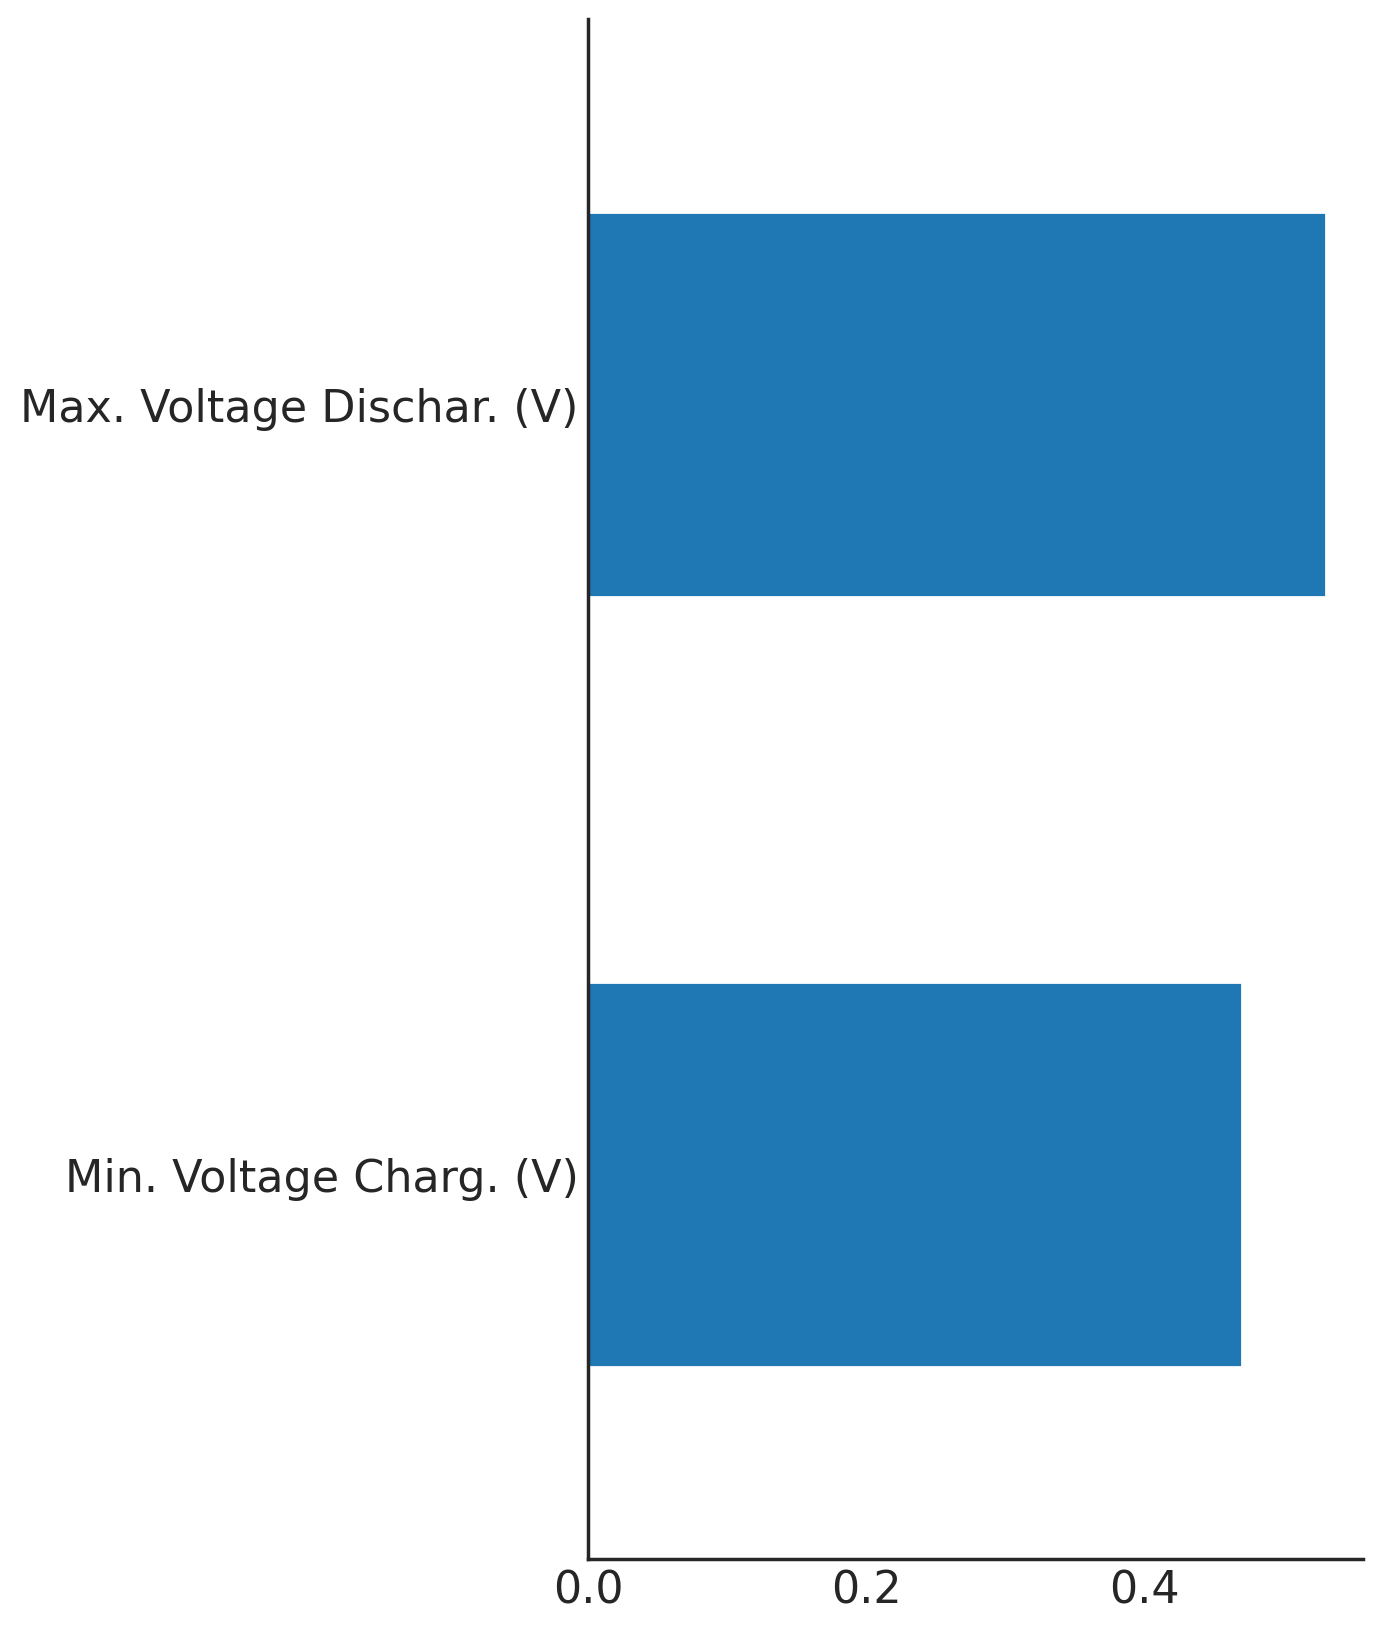

In [ ]:
plt.rcParams['figure.figsize']=5,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

In [ ]:
df_test.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),RUL,Battery ID
8629,1,2565.31,1186.4965,3.664,3.221,5439.007,6740.99,1107,9
8630,2,7333.44,1196.9920,4.240,3.227,5480.992,6740.99,1106,9
8631,3,7302.50,1133.9840,4.242,3.232,5460.000,6720.00,1105,9
8632,4,7300.03,1099.0080,4.244,3.234,5467.004,6720.00,1104,9
8633,6,64835.52,1116.4960,4.288,3.239,5467.008,107695.78,1102,9


In [ ]:
df_test['RUL predicted'] = y_predictions

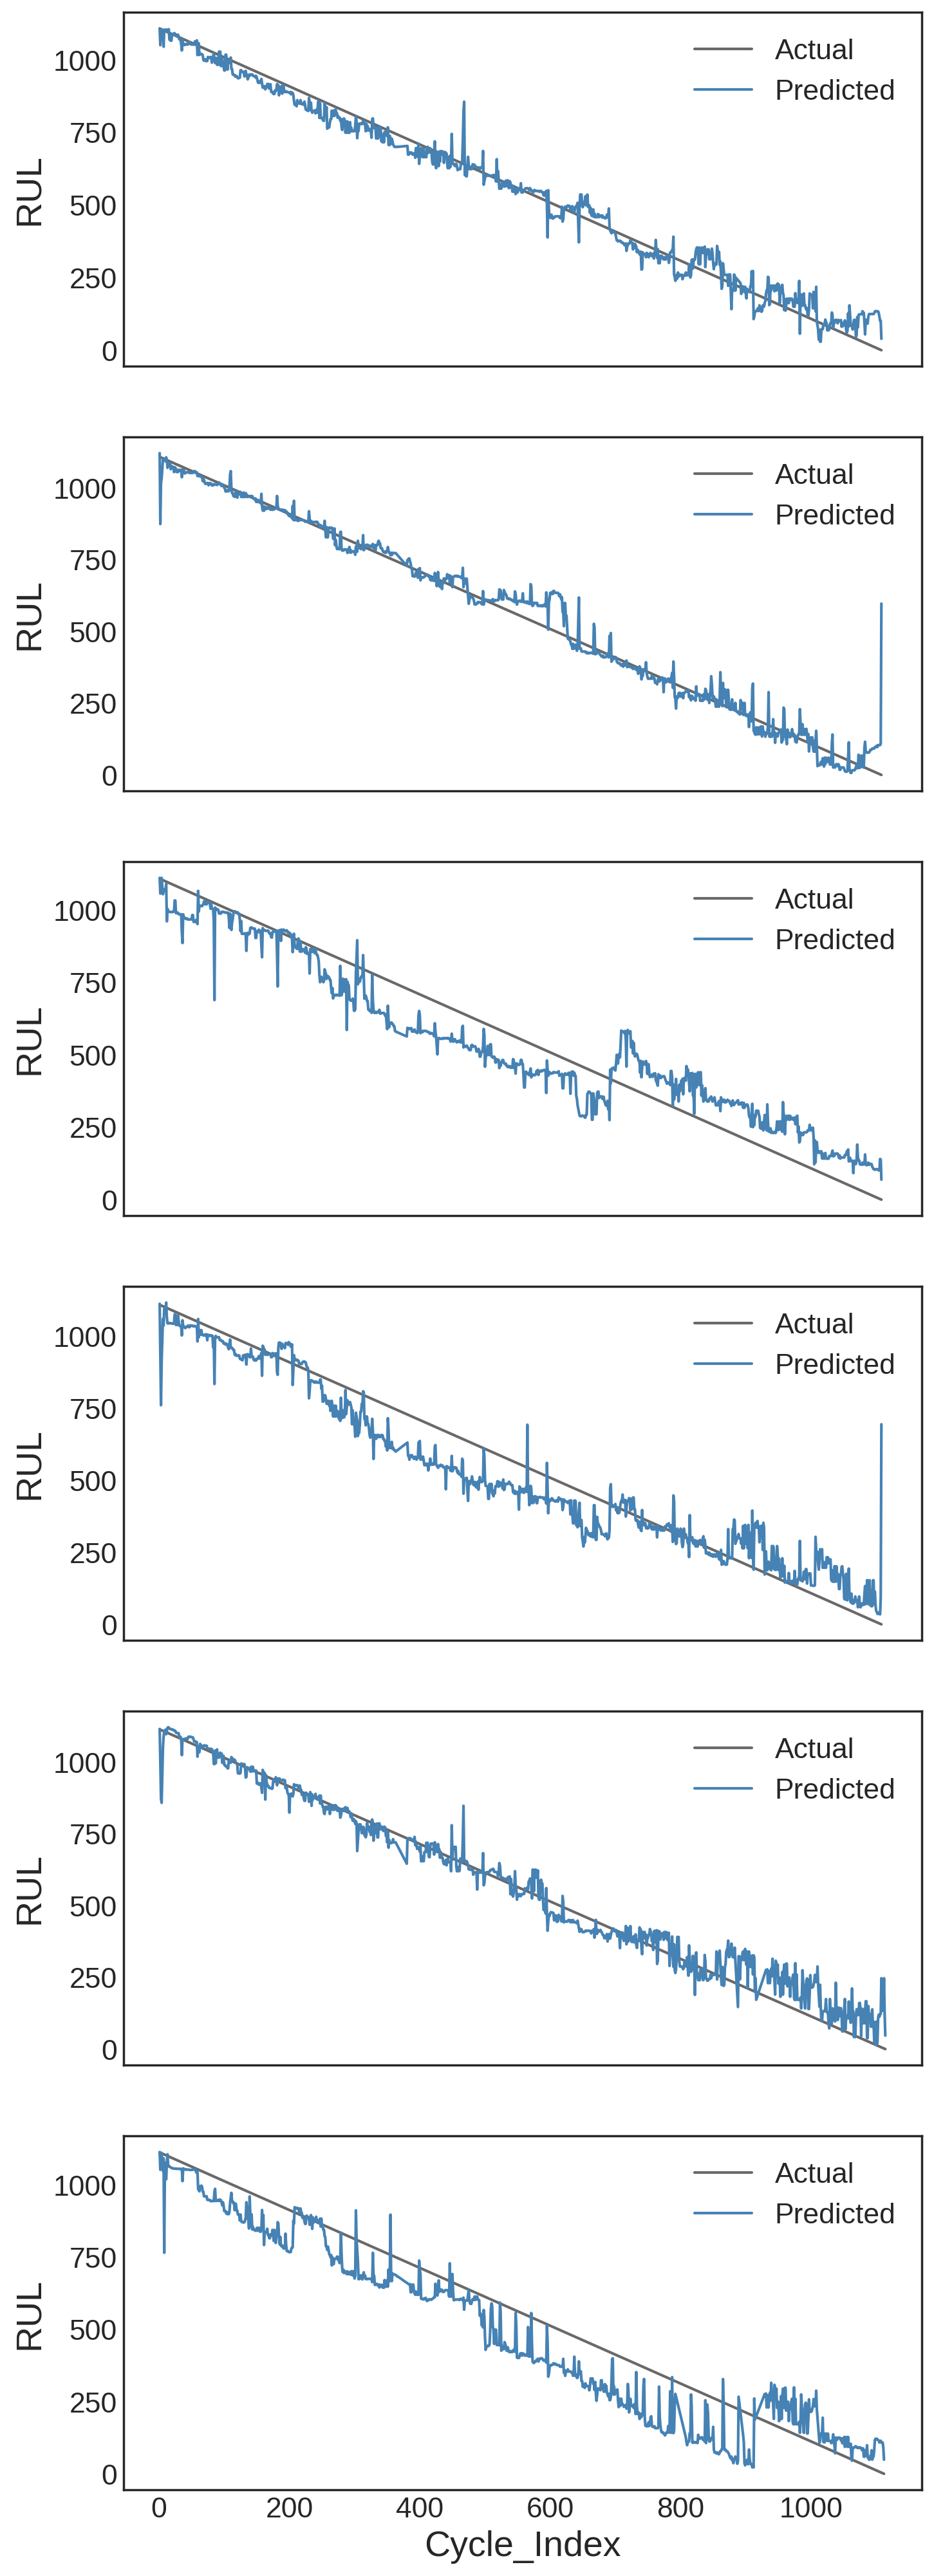

In [ ]:
batteries = list(df_train['Battery ID'].unique())
batteries_test = list(df_test['Battery ID'].unique())

plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,25
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 1.5
fig,ax = plt.subplots(len(batteries_test),sharex=True)

for i, battery in enumerate(batteries_test):
    f = sns.lineplot(data=df_test[df_test['Battery ID']==battery],
                     x='Cycle_Index',
                     y='RUL',
                     color='dimgray',
                     ax=ax[i],
                     label='Actual'
                    )
    g = sns.lineplot(data=df_test[df_test['Battery ID']==battery],
                     x='Cycle_Index',
                     y='RUL predicted',
                     color='steelblue',
                     ax=ax[i],
                     label='Predicted'
                    )
    ax[i].legend = True

<a id='5'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Our Novel Models</b>

<a id='5_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>XGBoost</b>

In [ ]:
# import libraries
import xgboost as xgb
import matplotlib.pyplot as plt
# load data
data = pd.read_csv('Battery_RUL.csv')
# split data into features and target variable
X = data.drop(['RUL'], axis=1)
Y = data['RUL']
# split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# feature normalization
norm = np.linalg.norm(X_train, axis=0)
X_train = X_train / norm
X_test = X_test / norm
# create XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)
# fit the model on training data
xgb_model.fit(X_train, Y_train)
# make predictions on training and testing sets
train_predict = xgb_model.predict(X_train)
test_predict = xgb_model.predict(X_test)
# calculate RMSE and R2 score for training and testing sets
train_score_rmse = np.sqrt(mean_squared_error(Y_train, train_predict))
test_score_rmse = np.sqrt(mean_squared_error(Y_test, test_predict))
train_score_r2 = r2_score(Y_train, train_predict)
test_score_r2 = r2_score(Y_test, test_predict)

# calculate RMSE and R2 score as percentage of mean of target variable
mean_Y_train = np.mean(Y_train)
train_score_rmse_percent = (train_score_rmse / mean_Y_train) * 100
test_score_rmse_percent = (test_score_rmse / mean_Y_train) * 100
train_score_r2_percent = train_score_r2 * 100
test_score_r2_percent = test_score_r2 * 100

# print results
print("Training RMSE: %f%%" % train_score_rmse_percent)
print("Testing RMSE: %f%%" % test_score_rmse_percent)
print("Training R2 score: %f%%" % train_score_r2_percent)
print("Testing R2 score: %f%%" % test_score_r2_percent)

Training RMSE: 0.240529%
Testing RMSE: 0.636246%
Training R2 score: 99.998282%
Testing R2 score: 99.987930%


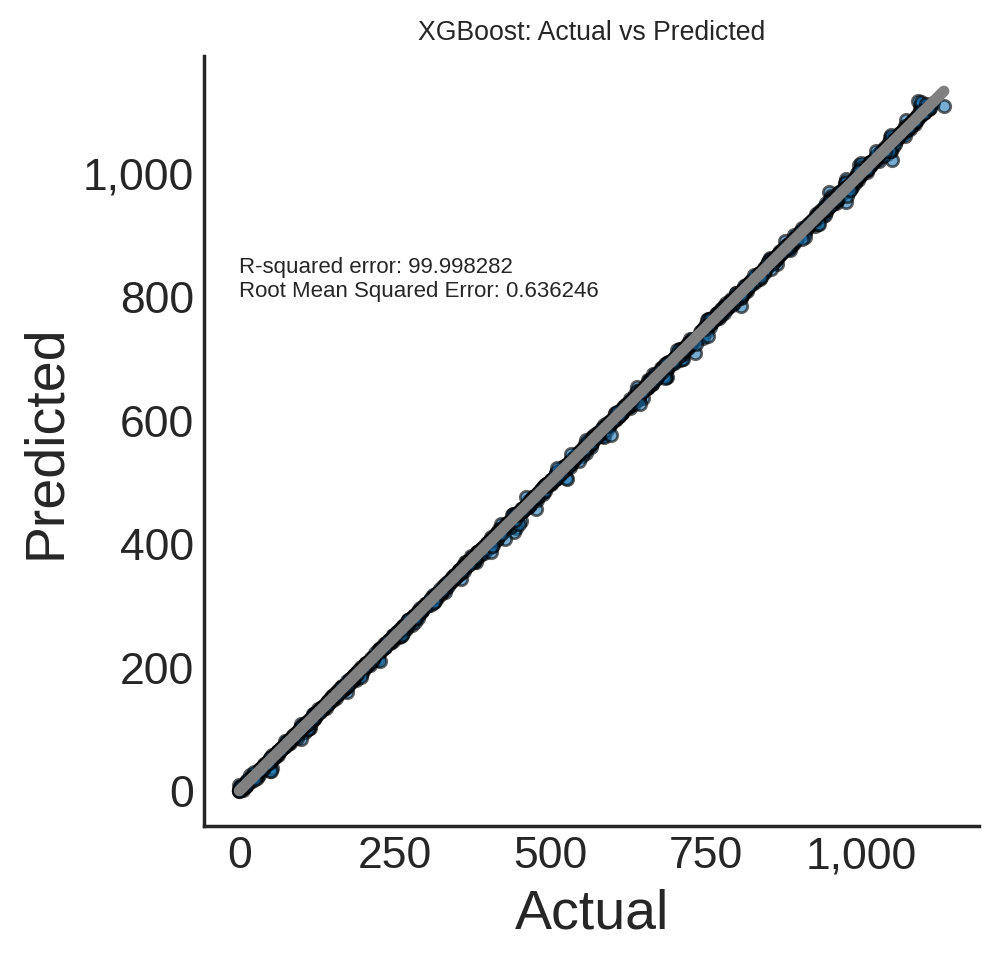

In [ ]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=5,5

fig,ax = plt.subplots()
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=Y_test,
                y=test_predict,
                s=20,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(Y_test),max(Y_test)],
             y=[min(Y_test),max(Y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:f}".format(train_score_r2_percent) +'\n' +
                  'Root Mean Squared Error: '+ "{:f}".format(test_score_rmse_percent)),
             xy=(0,800),
             size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()


## Catboost

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
# load the dataset
dataset = pd.read_csv('Battery_RUL.csv')

# separate features and target variable
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

# split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train the CatBoost model
ctb_model = CatBoostRegressor(iterations=1000, learning_rate=0.1,depth=6)
ctb_model.fit(X_train, Y_train, eval_set=(X_test, Y_test), early_stopping_rounds=50,verbose=False)

# make predictions on the testing data
Y_pred = ctb_model.predict(X_test)

# calculate RMSE and R2 score for testing set
rmse = np.sqrt(np.mean((Y_test - Y_pred)**2))
r2 = 1 - np.sum((Y_test - Y_pred)**2) / np.sum((Y_test - np.mean(Y_test))**2)
print('Catboost Testing RMSE: {:f}%'.format((rmse/np.mean(Y_test))*100))
print('Catboost Testing R2 score: {:f}%'.format(r2*100))

Catboost Testing RMSE: 0.892923%
Catboost Testing R2 score: 99.976291%


Text(0.5, 1.0, 'CatBoost Predicted vs. Actual RUL')

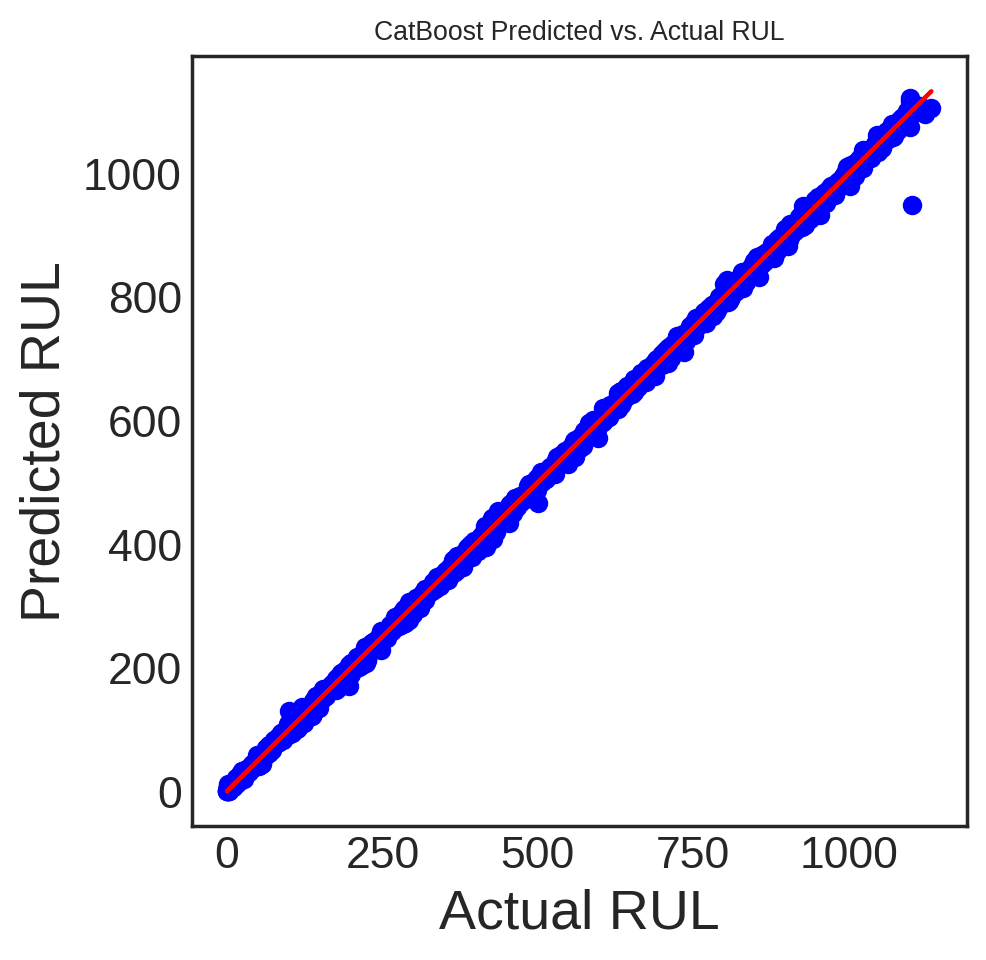

In [ ]:
# plot predicted vs. actual values
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred, color='blue')
ax.plot(Y_test, Y_test, color='red')
ax.set_xlabel('Actual RUL')
ax.set_ylabel('Predicted RUL')
ax.set_title('CatBoost Predicted vs. Actual RUL')

<a id='5_2'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>LSTM</b>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pd.read_csv('Battery_RUL.csv')
data.drop(['Cycle_Index'],axis=1)

# Normalize data
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data.drop(['RUL'], axis=1))
target_norm = scaler.fit_transform(data[['RUL']])

print(data_norm)
print(target_norm)

# Split data into training, validation, and testing sets
LSTM_X_train, LSTM_X_test, LSTM_y_train, LSTM_y_test = train_test_split(data_norm, target_norm,
                                                    test_size=0.2, random_state=42)

LSTM_X_train, LSTM_X_val, LSTM_y_train, LSTM_y_val = train_test_split(LSTM_X_train, LSTM_y_train,
                                                    test_size=0.2, random_state=42)

# Reshape input data
LSTM_X_train = LSTM_X_train.reshape((LSTM_X_train.shape[0], 1, LSTM_X_train.shape[1]))
LSTM_X_val = LSTM_X_val.reshape((LSTM_X_val.shape[0], 1, LSTM_X_val.shape[1]))
LSTM_X_test = LSTM_X_test.reshape((LSTM_X_test.shape[0], 1, LSTM_X_test.shape[1]))

# Define model architecture
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1,LSTM_X_train.shape[2])))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train model with validation set
history = model.fit(LSTM_X_train, LSTM_y_train, epochs=100, batch_size=32, verbose=0,
                    validation_data=(LSTM_X_val, LSTM_y_val))

# Evaluate model on test set
LSTM_y_pred = model.predict(LSTM_X_test)
mse = mean_squared_error(LSTM_y_test, LSTM_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(LSTM_y_test, LSTM_y_pred)
print(f"LSTM model R-squared: {r2:%}")
print(f"LSTM model RMSE: {rmse:%}")
print(f"LSTM model MSE: {mse:%}")

# LSTM model R-squared: 99.943577%
# LSTM model RMSE: 0.674761%
# LSTM model MSE: 0.004553%

[[0.00000000e+00 2.69913229e-03 4.95801028e-01 ... 7.66306403e-03
  1.22306909e-02 0.00000000e+00]
 [8.82612533e-04 7.72186143e-03 4.95827166e-01 ... 7.67102341e-03
  1.19156426e-02 0.00000000e+00]
 [1.76522507e-03 7.70633412e-03 4.95753168e-01 ... 7.67102341e-03
  1.18248421e-02 0.00000000e+00]
 ...
 [9.78817299e-01 7.93510103e-04 4.94592435e-01 ... 1.59679196e-03
  7.52920796e-03 1.00000000e+00]
 [9.79699912e-01 7.98477172e-04 4.94571322e-01 ... 1.29668595e-03
  8.69132253e-03 1.00000000e+00]
 [9.80582524e-01 7.07002319e-01 6.71830379e-01 ... 6.81059492e-01
  6.81059492e-01 1.00000000e+00]]
[[9.81465137e-01]
 [9.80582524e-01]
 [9.79699912e-01]
 ...
 [1.76522507e-03]
 [8.82612533e-04]
 [0.00000000e+00]]
95/95 [==============================] - 1s 4ms/step
LSTM model R-squared: 99.970966%
LSTM model RMSE: 0.484035%
LSTM model MSE: 0.002343%


Text(0.5, 1.0, 'LSTM Predicted vs. Actual RUL')

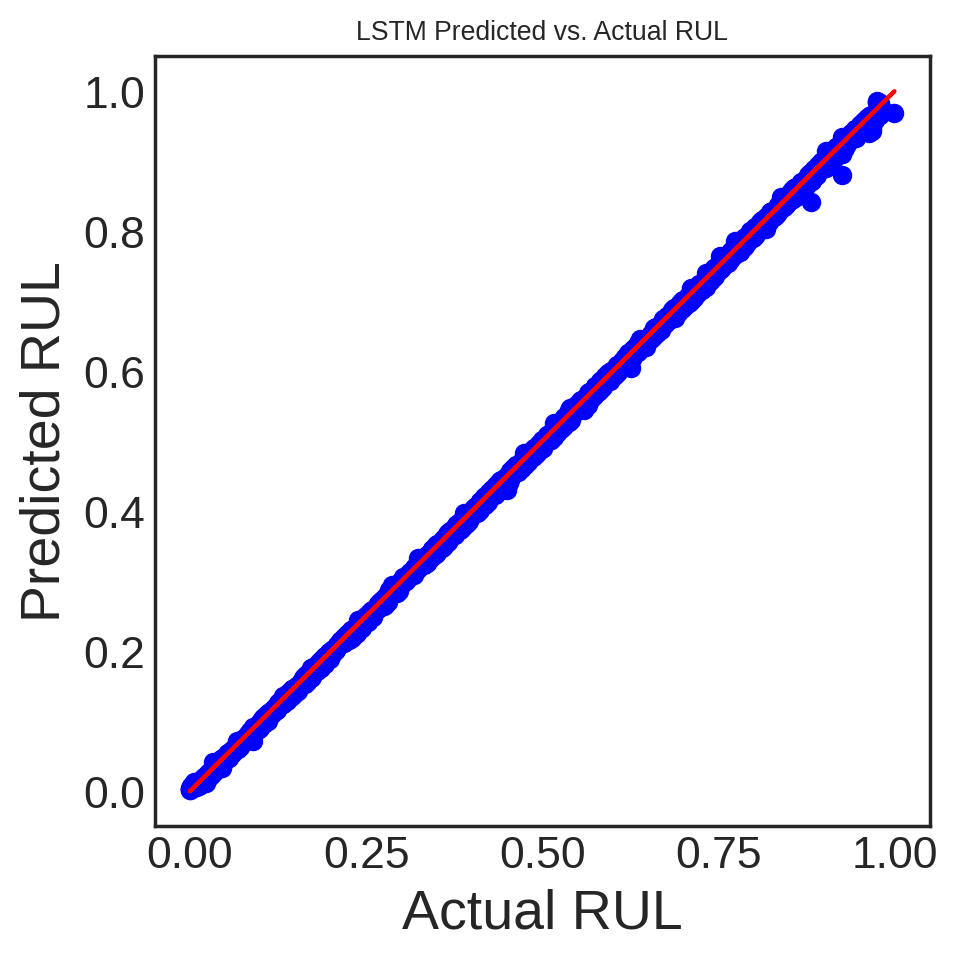

In [ ]:
# plot predicted vs. actual values
fig, ax = plt.subplots()
ax.scatter(LSTM_y_test, LSTM_y_pred, color='blue')
ax.plot(LSTM_y_test, LSTM_y_test, color='red')
ax.set_xlabel('Actual RUL')
ax.set_ylabel('Predicted RUL')
ax.set_title('LSTM Predicted vs. Actual RUL')

<a id='5_4'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Ensemble LSTM and KNN</b>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv('Battery_RUL.csv')
data.drop(['Cycle_Index'],axis=1)

# Normalize data
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data.drop(['RUL'], axis=1))
target_norm = scaler.fit_transform(data[['RUL']])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_norm, target_norm,
                                                    test_size=0.2, random_state=42)

# Train KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Train LSTM model
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
lstm = Sequential()
lstm.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1,X_train_lstm.shape[2])))
lstm.add(LSTM(50, activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu'))
lstm.add(Dense(1))
lstm.compile(optimizer='adam', loss='mse')
lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions with KNN and LSTM models
y_pred_knn = knn.predict(X_test)
y_pred_lstm = lstm.predict(X_test_lstm)
y_pred_ensemble = (y_pred_knn + y_pred_lstm) / 2

# Evaluate ensemble model
mse = mean_squared_error(y_test, y_pred_ensemble)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ensemble)
print(f"Ensemble model R-squared: {r2:%}")
print(f"Ensemble model RMSE: {rmse:%}")


95/95 [==============================] - 1s 2ms/step
Ensemble model R-squared: 99.976854%
Ensemble model RMSE: 0.432169%


Text(0.5, 1.0, 'LSTM+KNN Predicted vs. Actual RUL')

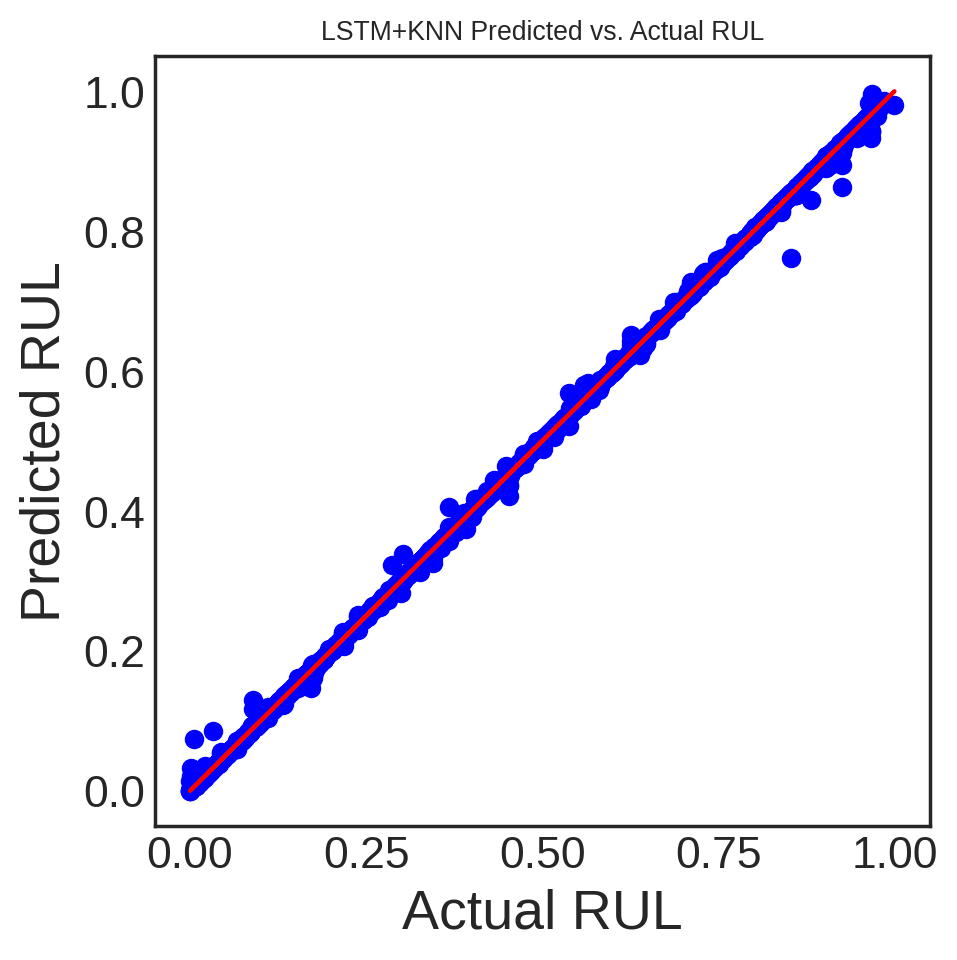

In [ ]:
# plot predicted vs. actual values
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_ensemble, color='blue')
ax.plot(y_test, y_test, color='red')
ax.set_xlabel('Actual RUL')
ax.set_ylabel('Predicted RUL')
ax.set_title('LSTM+KNN Predicted vs. Actual RUL')

<a id='5_6'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>GRU</b>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping


# Load data
data=pd.read_csv('Battery_RUL.csv')
data.drop(['Cycle_Index'],axis=1)

# Normalize data
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data.drop(['RUL'], axis=1))
target_norm = scaler.fit_transform(data[['RUL']])


# Split data into training, validation, and testing sets
GRU_X_train, GRU_X_val, GRU_y_train, GRU_y_val = train_test_split(data_norm, target_norm,
                                                    test_size=0.2, random_state=42)
GRU_X_train, GRU_X_test, GRU_y_train, GRU_y_test = train_test_split(GRU_X_train, GRU_y_train,
                                                    test_size=0.2, random_state=42)

# Reshape input data
GRU_X_train = GRU_X_train.reshape((GRU_X_train.shape[0], 1, GRU_X_train.shape[1]))
GRU_X_val = GRU_X_val.reshape((GRU_X_val.shape[0], 1, GRU_X_val.shape[1]))
GRU_X_test = GRU_X_test.reshape((GRU_X_test.shape[0], 1, GRU_X_test.shape[1]))

# GRU model architecture
model = Sequential()
model.add(GRU(100, input_shape=(1, GRU_X_train.shape[2]), activation='relu', return_sequences=True))
model.add(GRU(75, activation='relu', return_sequences=True))
model.add(GRU(50, activation='relu', return_sequences=True))
model.add(GRU(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train model
history = model.fit(GRU_X_train, GRU_y_train, epochs=50, batch_size=32, verbose=0, validation_data=(GRU_X_val, GRU_y_val), callbacks=[early_stopping])

# Evaluate model
GRU_y_pred = model.predict(GRU_X_test)
mse = mean_squared_error(GRU_y_test, GRU_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(GRU_y_test, GRU_y_pred)
print(f"GRU model R-squared: {r2:%}")
print(f"GRU model RMSE: {rmse:%}")
print(f"GRU model MSE: {mse:%}")
# GRU model R-squared: 99.931707%
# GRU model RMSE: 0.741592%
# GRU model MSE: 0.005500%

76/76 [==============================] - 1s 2ms/step
GRU model R-squared: 99.863562%
GRU model RMSE: 1.048202%
GRU model MSE: 0.010987%


Text(0.5, 1.0, 'GRU Predicted vs. Actual RUL')

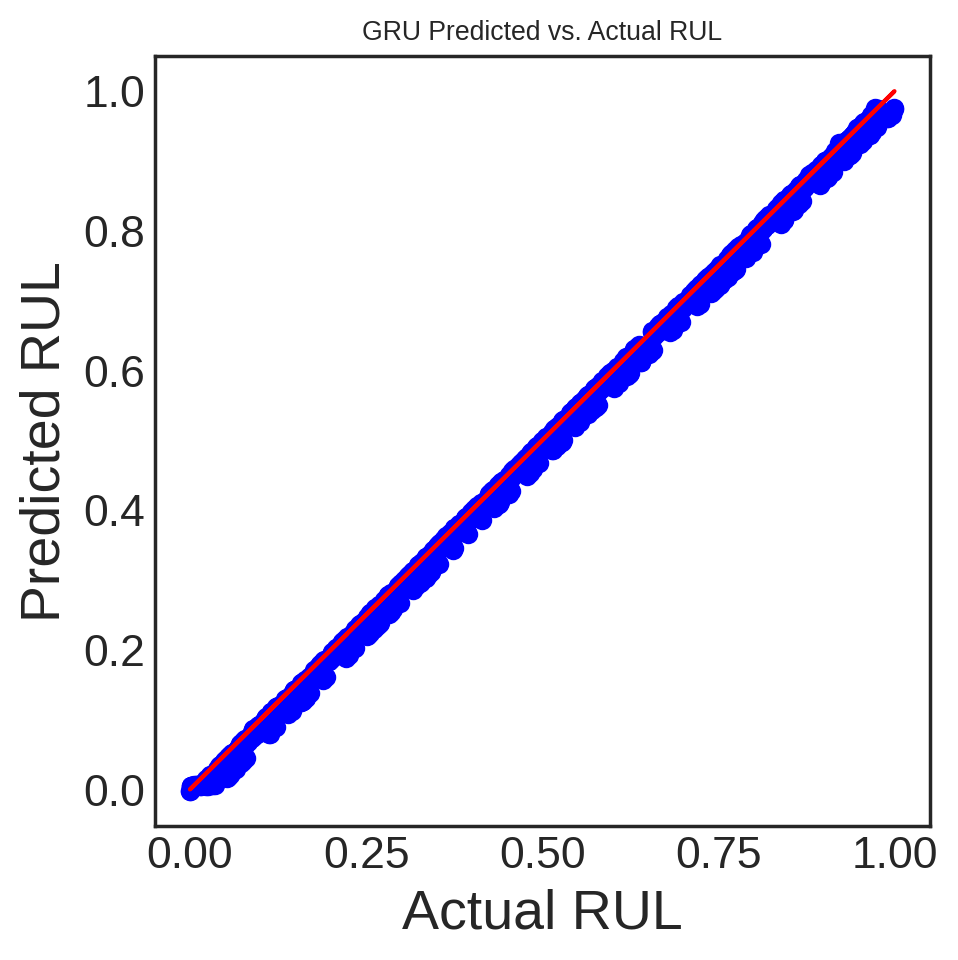

In [ ]:
# plot predicted vs. actual values
fig, ax = plt.subplots()
ax.scatter(GRU_y_test, GRU_y_pred, color='blue')
ax.plot(GRU_y_test, GRU_y_test, color='red')
ax.set_xlabel('Actual RUL')
ax.set_ylabel('Predicted RUL')
ax.set_title('GRU Predicted vs. Actual RUL')


<a id='5_6'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Bidirectional GRU</b>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU
from tensorflow.keras.callbacks import EarlyStopping


# Load data
data = pd.read_csv('Battery_RUL.csv')
data.drop(['Cycle_Index'],axis=1)

# Normalize data
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data.drop(['RUL'], axis=1))
target_norm = scaler.fit_transform(data[['RUL']])


# Split data into training, validation, and testing sets
BD_GRU_X_train, BD_GRU_X_val, BD_GRU_y_train, BD_GRU_y_val = train_test_split(data_norm, target_norm,
                                                    test_size=0.2, random_state=42)
BD_GRU_X_train, BD_GRU_X_test, BD_GRU_y_train, BD_GRU_y_test = train_test_split(BD_GRU_X_train, BD_GRU_y_train,
                                                    test_size=0.2, random_state=42)

# Reshape input data
BD_GRU_X_train = BD_GRU_X_train.reshape((BD_GRU_X_train.shape[0], 1, BD_GRU_X_train.shape[1]))
BD_GRU_X_val = BD_GRU_X_val.reshape((BD_GRU_X_val.shape[0], 1, BD_GRU_X_val.shape[1]))
BD_GRU_X_test = BD_GRU_X_test.reshape((BD_GRU_X_test.shape[0], 1, BD_GRU_X_test.shape[1]))

# Bidirectional GRU model architecture
model = Sequential()
model.add(Bidirectional(GRU(100, activation='relu'), input_shape=(1, BD_GRU_X_train.shape[2])))
model.add(Dense(75, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train model
history = model.fit(BD_GRU_X_train, BD_GRU_y_train, epochs=100, batch_size=32, verbose=0, validation_data=(BD_GRU_X_val, BD_GRU_y_val), callbacks=[early_stopping])

# Evaluate model
BD_GRU_y_pred = model.predict(BD_GRU_X_test)
mse = mean_squared_error(BD_GRU_y_test, BD_GRU_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(BD_GRU_y_test, BD_GRU_y_pred)
print(f"Bidirectional GRU model R-squared: {r2:%}")
print(f"Bidirectional GRU model RMSE: {rmse:%}")
print(f"Bidirectional GRU model MSE: {mse:%}")
# Bidirectional GRU model R-squared: 99.984625%
# Bidirectional GRU model RMSE: 0.351868%
# Bidirectional GRU model MSE: 0.001238%

76/76 [==============================] - 0s 2ms/step
Bidirectional GRU model R-squared: 99.942923%
Bidirectional GRU model RMSE: 0.677963%
Bidirectional GRU model MSE: 0.004596%


In [ ]:
# plot predicted vs. actual values
fig, ax = plt.subplots()
ax.scatter(BD_GRU_y_test, BD_GRU_y_pred, color='blue')
ax.plot(BD_GRU_y_test, BD_GRU_y_test, color='red')
ax.set_xlabel('Actual RUL')
ax.set_ylabel('Predicted RUL')
ax.set_title('Bidirectional GRU Predicted vs. Actual RUL')

Text(0.5, 1.0, 'Bidirectional GRU Predicted vs. Actual RUL')

<a id='5_8'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Bidirectional LSTM</b>

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

# Load data
data = pd.read_csv('Battery_RUL.csv')
data.drop(['Cycle_Index'], axis=1, inplace=True)

# Normalize data
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data.drop(['RUL'], axis=1))
target_norm = scaler.fit_transform(data[['RUL']])

# Split data into training and testing sets
BD_LSTM_X_train, BD_LSTM_X_test, BD_LSTM_y_train, BD_LSTM_y_test = train_test_split(data_norm, target_norm,
                                                    test_size=0.2, random_state=42)

# Reshape input data
BD_LSTM_X_train = BD_LSTM_X_train.reshape((BD_LSTM_X_train.shape[0], 1, BD_LSTM_X_train.shape[1]))
BD_LSTM_X_test = BD_LSTM_X_test.reshape((BD_LSTM_X_test.shape[0], 1, BD_LSTM_X_test.shape[1]))

# Define model architecture
def build_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=64, activation='relu', return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(units=64, activation='relu', return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
    return model

# Build model
model = build_model((BD_LSTM_X_train.shape[1], BD_LSTM_X_train.shape[2]))

# Train model
model.fit(BD_LSTM_X_train, BD_LSTM_y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate model
BD_LSTM_y_pred = model.predict(BD_LSTM_X_test).reshape(BD_LSTM_y_test.shape)

mse = mean_squared_error(BD_LSTM_y_test, BD_LSTM_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(BD_LSTM_y_test, BD_LSTM_y_pred)
print(f"bi-LSTM model R-squared: {r2:%}")
print(f"bi-LSTM model RMSE: {rmse:%}")
print(f"bi-LSTM model MSE: {mse:%}")

# bi-LSTM model R-squared: 97.395518%
# bi-LSTM model RMSE: 4.584379%
# bi-LSTM model MSE: 0.210165%

95/95 [==============================] - 1s 3ms/step
bi-LSTM model R-squared: 96.961063%
bi-LSTM model RMSE: 4.952000%
bi-LSTM model MSE: 0.245223%


Text(0.5, 1.0, 'Bidirectional LSTM Predicted vs. Actual RUL')

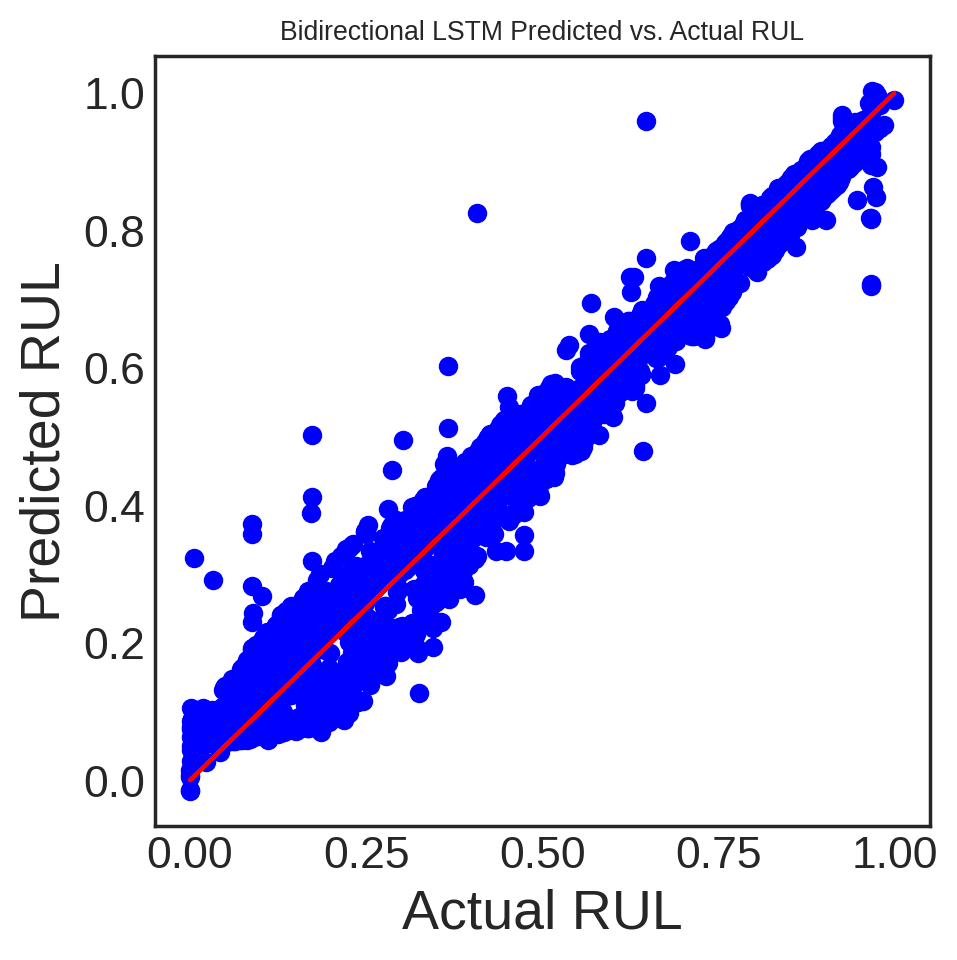

In [ ]:
# plot predicted vs. actual values
fig, ax = plt.subplots()
ax.scatter(BD_LSTM_y_test, BD_LSTM_y_pred, color='blue')
ax.plot(BD_LSTM_y_test, BD_LSTM_y_test, color='red')
ax.set_xlabel('Actual RUL')
ax.set_ylabel('Predicted RUL')
ax.set_title('Bidirectional LSTM Predicted vs. Actual RUL')

# Explainable AI (LIME)

In [ ]:
! pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=f43bc2fa4e42ac72cc227da46f8cbc72a40d36eb6a97de3d616e1eb061d62481
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


Intercept 420.75367163966814
Prediction_local [974.54175399]
Right: 1042.89


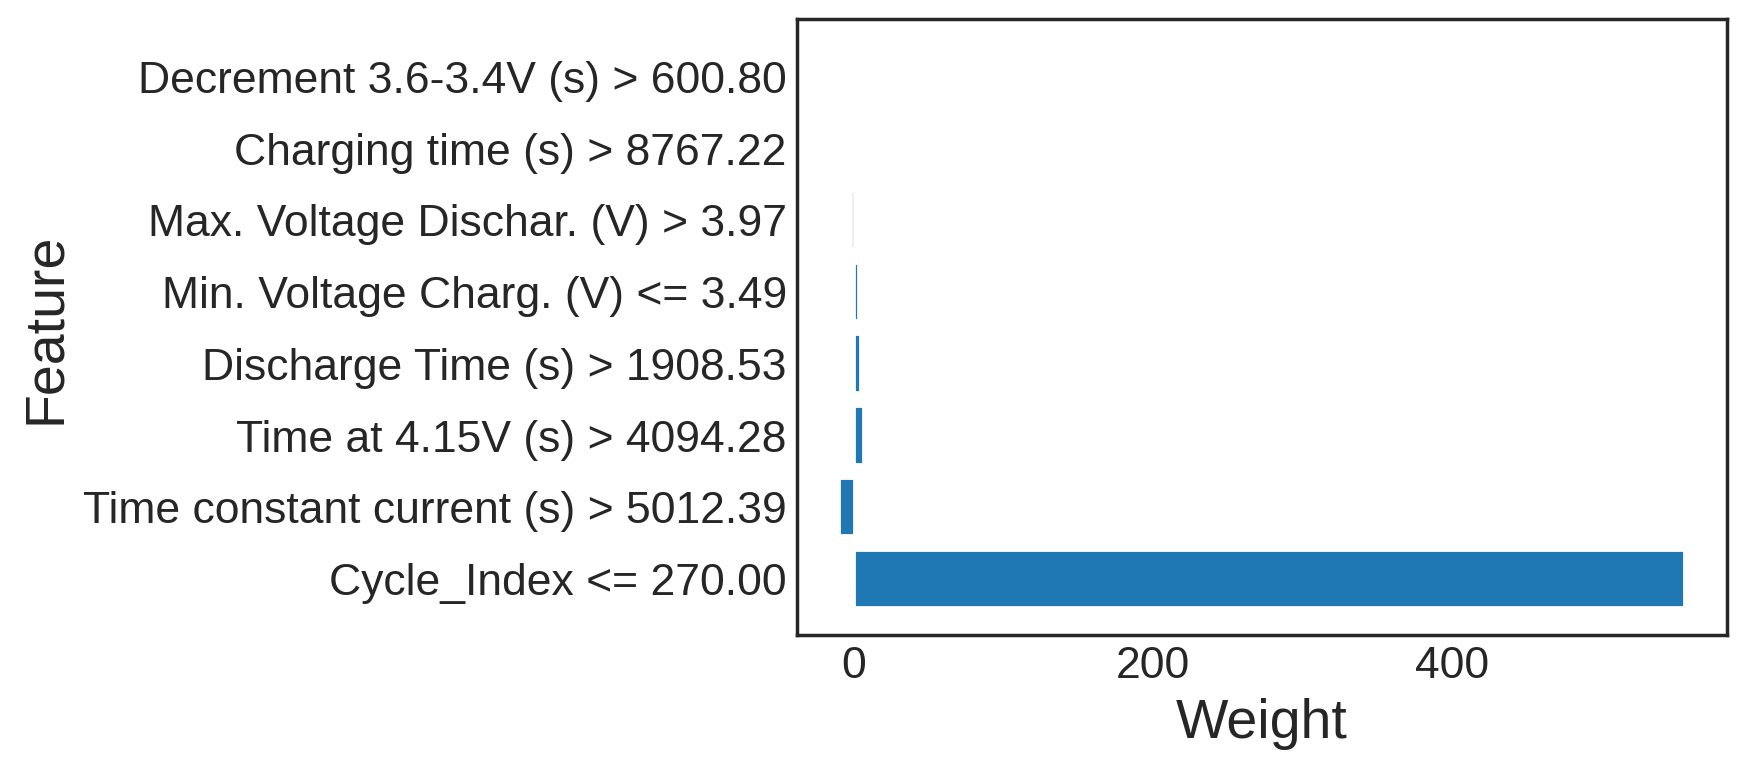

[('Cycle_Index <= 270.00', 555.4585066127818), ('Time constant current (s) > 5012.39', -10.196143135440156), ('Time at 4.15V (s) > 4094.28', 5.945444193426316), ('Discharge Time (s) > 1908.53', 4.210400114301648), ('Min. Voltage Charg. (V) <= 3.49', 2.6657244387887364), ('Max. Voltage Dischar. (V) > 3.97', -2.166606686240013), ('Charging time (s) > 8767.22', -1.5807078008146), ('Decrement 3.6-3.4V (s) > 600.80', -0.5485353896556565)]


In [ ]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

# Load the Battery RUL dataset
data = pd.read_csv('Battery_RUL.csv')
data.drop(['Cycle_Index'],axis=1)

# Normalize data
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data.drop(['RUL'], axis=1))
target_norm = scaler.fit_transform(data[['RUL']])

# Define the features and target variable
features = data.drop(['RUL'], axis=1)
target = data['RUL']

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Fit a random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_data.drop(['RUL'], axis=1), train_data['RUL'])

# Define the Lime explainer
explainer = lime.lime_tabular.LimeTabularExplainer(train_data.drop(['RUL'], axis=1).values,
                                                   feature_names=list(features.columns),
                                                   class_names=['RUL'],
                                                   verbose=True,
                                                   mode='regression')

# Define a function to visualize the LIME explanation
def plot_lime_explanation(explanation):
    plt.figure(figsize=(6, 4))
    plt.barh(range(len(explanation.as_list())), [x[1] for x in explanation.as_list()], align='center')
    plt.yticks(range(len(explanation.as_list())), [x[0] for x in explanation.as_list()])
    plt.xlabel('Weight')
    plt.ylabel('Feature')
    plt.show()

# Select a random test instance to explain
instance = test_data.drop(['RUL'], axis=1).iloc[0]

# Generate the LIME explanation for the instance
exp = explainer.explain_instance(instance.values, rf.predict, num_features=10)

# Visualize the LIME explanation
plot_lime_explanation(exp)

# Print the LIME explanation as a table
print(exp.as_list())
